Import necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from statsmodels.formula.api import ols
import statsmodels.api as sm

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
%matplotlib inline

from custom_functions import remove_extremes

Import dataset that was cleaned and prepared in Data Preparation notebook

In [2]:
conn = sqlite3.connect('../../data/processed/main.db')
query = '''SELECT * FROM df_main'''
df_main = pd.read_sql(query, conn, index_col='index').reset_index(drop=True)
#df_main.drop('index', axis=1, inplace=True)
df_main.head(3)
y = 'SalePrice'

In [3]:
def remove_df_extremes(df, devct, drop_zeros=False):
    
    for col in df.columns:
        df[col] = [float(num) for num in df[col]]
        med = df[col].median()
        std = df[col].std()

        max_ = med + devct*std
        min_ = 0.0001 if drop_zeros else med - devct*std 

        df[col] = [x if ((x>min_) & (x<max_)) else np.nan for x in df[col]]
    df.dropna(inplace=True)
    return df

In [4]:
def produce_model(df, x, y, devct, drop_zeros=False):
    model_data = pd.concat([df[y], df[x]], axis=1)
    model_data_trimmed = remove_df_extremes(model_data, devct, drop_zeros)

    formula = y + ' ~ ' + '+'.join(xs)
    model = ols(formula, model_data_trimmed).fit()
    print(formula)
    
    return model, model_data_trimmed


SalePrice ~ SqFtTotLiving


<Figure size 432x288 with 0 Axes>

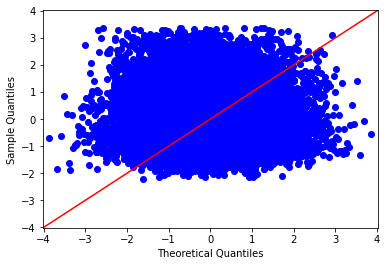

In [19]:
xs = ['SqFtTotLiving']


model, df_trimmed = produce_model(df_main, xs, y, 3)
model.summary()
qq(df_trimmed);
#sns.distplot(df_trimmed[y])

In [17]:
def qq(x):
    plt.figure()
    sm.graphics.qqplot(x.drop(y, axis=1), line='45', fit=True);

In [7]:
df_trimmed.loc[df_trimmed.SalePrice < 75000].sort_values(by='SalePrice')

,SalePrice,SqFtTotLiving
5668,25652.0,3869.0
8663,29000.0,1080.0
9427,31000.0,1010.0
16294,34550.0,1920.0
4128,35484.0,1390.0
3408,36000.0,2080.0
12051,41720.0,1170.0
9615,65000.0,670.0
17291,69000.0,770.0
